In [56]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [18]:
# Load dataset (no internet required once TensorFlow is installed)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
y_train.shape

(60000,)

In [21]:
X_train = x_train.reshape(x_train.shape[0],-1)

In [22]:
X_train.shape

(60000, 784)

In [24]:
x_test.shape

(10000, 28, 28)

In [25]:
X_test = x_test.reshape(x_test.shape[0],-1)
X_test.shape

(10000, 784)

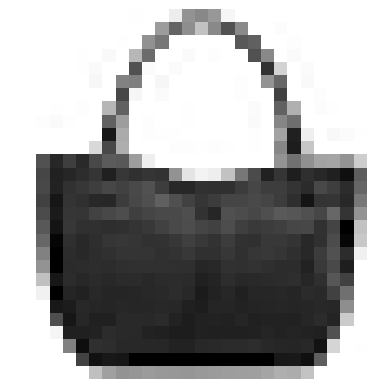

In [48]:
some_digit = X_train[100]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

## The Golden Rule
### You fit your preprocessors (like PCA or StandardScaler) only once on your training data. Then, you use that same fitted object to .transform() both your training data and any new test data.

### Preprocessing Steps

In [69]:
## Scaling
scaler = StandardScaler()



In [70]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

### Applying Softmax Regression

In [33]:
clf = LogisticRegression(multi_class = 'multinomial',max_iter = 1000,solver = 'lbfgs',random_state = 42)

In [34]:
clf.fit(X_train_scaled,y_train)

c:\Python3.13\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [35]:
y_pred = clf.predict(X_test_scaled)

In [36]:
print(accuracy_score(y_test,y_pred))

0.8347


### Confusion Matrix

In [44]:
conf_mx = confusion_matrix(y_test,y_pred)
conf_mx

array([[797,   3,  11,  61,   4,   0, 112,   2,   9,   1],
       [  2, 957,   4,  25,   5,   0,   3,   1,   2,   1],
       [ 22,   4, 721,  13, 132,   0,  94,   1,  13,   0],
       [ 24,  24,  21, 848,  28,   1,  42,   1,  11,   0],
       [  0,   1, 119,  36, 750,   1,  75,   0,  18,   0],
       [  0,   1,   0,   0,   0, 917,   0,  44,   7,  31],
       [135,   5, 123,  45, 104,   1, 559,   0,  28,   0],
       [  0,   0,   0,   0,   0,  36,   0, 935,   2,  27],
       [  9,   1,   5,  13,   5,   9,  27,   7, 922,   2],
       [  0,   1,   1,   0,   0,  21,   0,  36,   0, 941]])

### Error Analysis

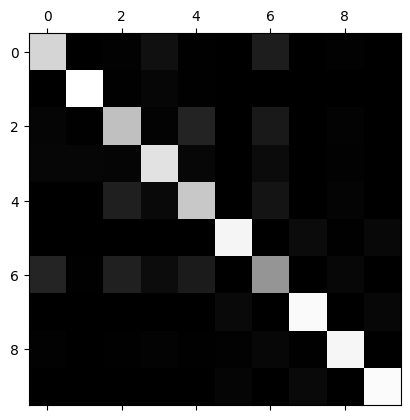

In [45]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [46]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums


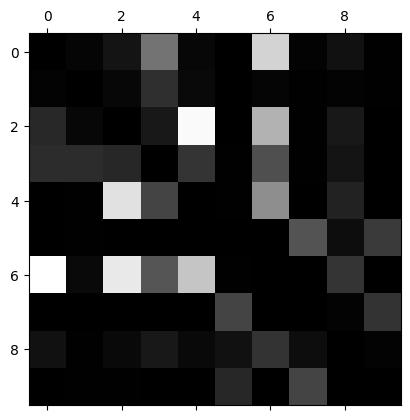

In [47]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## Trianing on a small datset of fashion_mnist dataset with PCA to Visualize

In [66]:
# Basically we have reduced the trained_scaled_data to make faster processing
# We'll use a subset for faster processing
X_subset_scaled = X_train_scaled[:5000]
y_subset = y_train[:5000]

print("\nApplying PCA to reduce data to 2 dimensions...")
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_subset_scaled)
print("PCA complete.")



Applying PCA to reduce data to 2 dimensions...
PCA complete.


In [67]:
# Train a SEPARATE, NEW model on the 2D data
# The visual model must be trained on the same 2D data it will be plotted on.
print("Training a new model on the 2D PCA data for visualization...")
softmax_reg_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_reg_pca.fit(X_train_pca, y_subset)
print("Visual model training complete.")

Training a new model on the 2D PCA data for visualization...


c:\Python3.13\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Visual model training complete.


Plotting decision regions...


c:\Python3.13\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


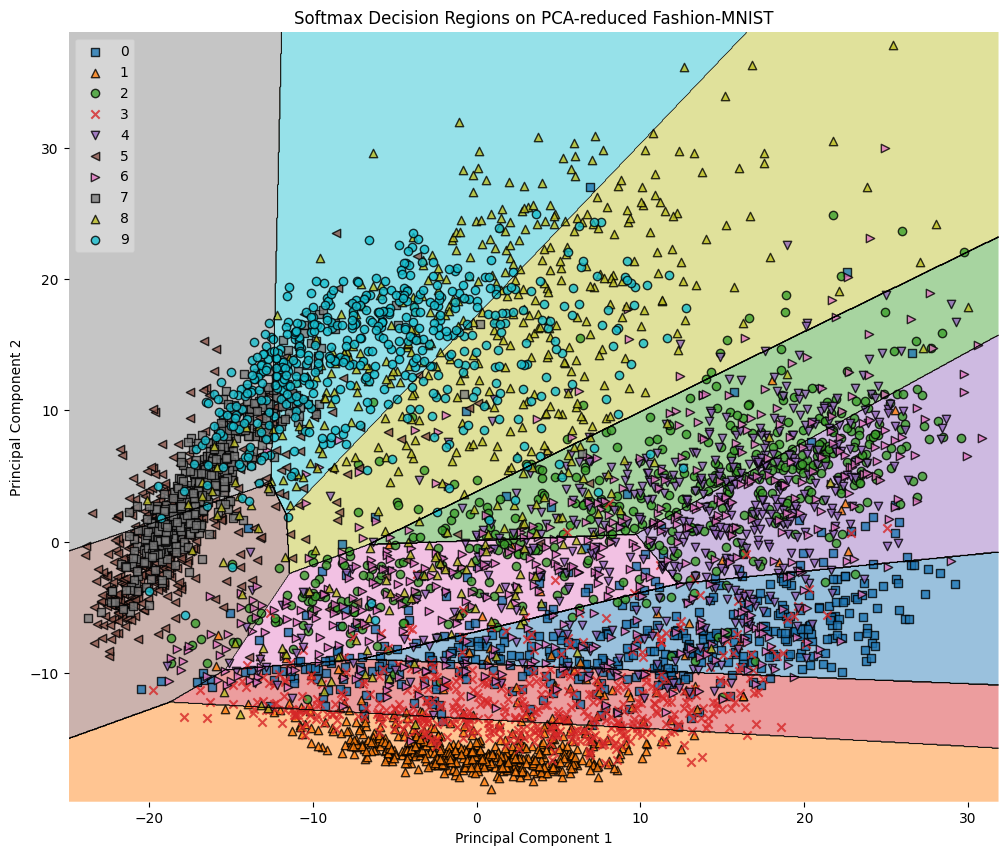

In [65]:
# 3. Plot the Decision Regions
print("Plotting decision regions...")
plt.figure(figsize=(12, 10))
plot_decision_regions(X_train_pca, y_subset, clf=softmax_reg_pca, legend=2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Softmax Decision Regions on PCA-reduced Fashion-MNIST')
plt.show()

### Prediction


In [95]:
# Choosing a sample random image to predict
sample_index = np.random.randint(0, 10000) # choose random number from 0 to 9999 that is from X_test has 10000 values
new_image = X_test[sample_index]
true_label = y_test[sample_index]


# Reshape 
new_image_reshaped = new_image.reshape(1, 28 * 28)

#Scale the data using the SAME scaler from training
new_image_scaled = scaler.transform(new_image_reshaped.astype(np.float64))

#Apply PCA using the SAME pca object from training
new_image_pca = pca.transform(new_image_scaled)


# Making the Predictions
predicted_label = softmax_reg_pca.predict(new_image_pca)
predicted_probabilities = softmax_reg_pca.predict_proba(new_image_pca)


# Results
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(f"True Label: {class_names[true_label]} (Class {true_label})")
print(f"Predicted Label: {class_names[predicted_label[0]]} (Class {predicted_label[0]})")

# Print the confidence for the predicted class
confidence = np.max(predicted_probabilities)
print(f"Model Confidence: {confidence:.2%}")

True Label: Sandal (Class 5)
Predicted Label: Sandal (Class 5)
Model Confidence: 46.30%
